In [2]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("files/results.csv")
df = df.sort_values('Date').reset_index(drop=True)

##  תרגיל 1

###### מה ההסתברות של ניצחון של הקבוצה המארחת בעונת 2008 ? 

In [10]:
season2008 = df[df["Season"] == "2008-09"]
print(f"{(season2008['FTR'] == 'H').mean() * 100:.5f}%")

45.52632%


## תרגיל 2

###### צייר את ההסתברות לניצחון של הקבוצה המארחת לאורך השנים.
###### ציר ה x - העונה
###### ציר ה y - ההסתברות לניצחון של הקבוצה המארחת.

<AxesSubplot:xlabel='Season'>

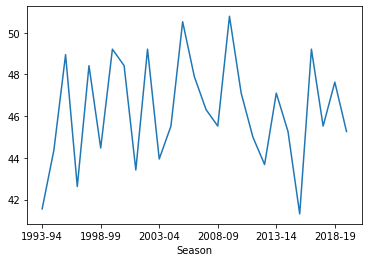

In [11]:
all_seasons = df.groupby("Season").apply(lambda df: (df["FTR"] == "H").mean() * 100)
all_seasons.plot()

## תרגיל 3

### אם קבוצה מסוימת היתה משנה את השם שלה בין העונה 2012/2013 לעונה 2013/2014 איך היינו רואים את זה בנתונים ?

היינו רואים שבעונה 2012/2013 היא נמצאת בליגה ובעונה 2013/2014 כבר לא.
היה יותר קל לזהות את זה אם הקבוצה לא הייתה אמורה לרדת ליגה בעונה 2012/2013 כי אז היינו יודעים שלא בגלל זה היא נעלמה.

## תרגיל 4

האם יש קבוצה שניתן לזהות שהיא שינתה את השם שלה ?

In [47]:
# **בהנחה שהקבוצות שיורדות של ליגה את מספר קבוצות כלשהן **מהסוף
seas_table = seas_table.sort_values(['Season', 'Points in season'])
seasons = list(seas_table.groupby('Season'))
n_teams_down = []

for (season, season_df), (next_season, next_season_df) in zip(seasons[:-1], seasons[1:]):
    season_teams = set(season_df['Team'])
    next_season_teams = set(next_season_df['Team'])
    down_league = season_teams - next_season_teams
    n_teams_down.append(len(down_league))

n_teams_down = pd.Series(n_teams_down)
print(f'{n_teams_down.mode().iloc[0]} teams going down from the league every season')

3 teams going down from the league every season


In [43]:
seas_table = seas_table.sort_values(['Season', 'Points in season'], ascending=[True, False])
seasons_tables = list(seas_table.groupby('Season'))

for (season, season_df), (next_seas, next_seas_df) in zip(seasons_tables[:-1], seasons_tables[1:]):
    season_teams = set(season_df['Team'].iloc[:-3])
    next_seas_teams = set(next_seas_df['Team'])
    gone_teams = season_teams - next_seas_teams
    renaming_potentials = next_seas_teams - season_teams
    
    for gone in gone_teams:
        for rename in renaming_potentials:
            played_parallel = seas_table.groupby('Season')['Team'].apply(lambda x: {rename, gone} <= set(x))
            
            if not(played_parallel.any()):
                print(f'Perhaps {gone} changed its name to {rename} after the {season} season. They did not play concurrently in any season, and just after Middlesbrough left, Burnsley appeared.\n')

Perhaps Middlesbrough changed its name to Barnsley after the 1996-97 season. They did not play concurrently in any season, and just after Middlesbrough left, Burnsley appeared.

Perhaps Sheffield United changed its name to Sunderland after the 2006-07 season. They did not play concurrently in any season, and just after Middlesbrough left, Burnsley appeared.

Perhaps Sheffield United changed its name to Birmingham after the 2006-07 season. They did not play concurrently in any season, and just after Middlesbrough left, Burnsley appeared.

Perhaps Sheffield United changed its name to Derby after the 2006-07 season. They did not play concurrently in any season, and just after Middlesbrough left, Burnsley appeared.



## תרגיל 5 ו - 6

5. תספור לכל קבוצה, בכמה עונות היא שיחקה
6. מי הן 5 הקבוצות ששיחקו בהכי הרבה עונות?

In [124]:
df.drop_duplicates(['HomeTeam', 'Season'])['HomeTeam'].value_counts()

Man United          27
Everton             27
Chelsea             27
Liverpool           27
Arsenal             27
Tottenham           27
Newcastle           25
West Ham            24
Aston Villa         24
Man City            22
Southampton         20
Blackburn           17
Sunderland          16
Fulham              14
Leicester           14
Middlesbrough       14
Bolton              13
West Brom           12
Leeds               11
Crystal Palace      10
Stoke               10
Charlton             8
Norwich              8
Wigan                8
Coventry             8
Portsmouth           7
Wimbledon            7
Watford              7
Sheffield Weds       7
Birmingham           7
Swansea              7
Derby                7
Wolves               6
QPR                  6
Burnley              6
Hull                 5
Bournemouth          5
Ipswich              4
Nott'm Forest        4
Sheffield United     3
Reading              3
Brighton             3
Huddersfield         2
Bradford   

# או

In [125]:
(df.groupby('HomeTeam')['Season'].nunique()).sort_values(ascending=False)

HomeTeam
Liverpool           27
Tottenham           27
Chelsea             27
Everton             27
Man United          27
Arsenal             27
Newcastle           25
West Ham            24
Aston Villa         24
Man City            22
Southampton         20
Blackburn           17
Sunderland          16
Fulham              14
Leicester           14
Middlesbrough       14
Bolton              13
West Brom           12
Leeds               11
Crystal Palace      10
Stoke               10
Charlton             8
Wigan                8
Coventry             8
Norwich              8
Watford              7
Wimbledon            7
Portsmouth           7
Birmingham           7
Sheffield Weds       7
Swansea              7
Derby                7
Burnley              6
Wolves               6
QPR                  6
Hull                 5
Bournemouth          5
Nott'm Forest        4
Ipswich              4
Brighton             3
Reading              3
Sheffield United     3
Huddersfield         2
Ca

## תרגיל 7

האם יש עונות שחונות בשערים ? תשרטט את כמות השערים הכוללת בעונה לאורך השנים.

<AxesSubplot:xlabel='Season'>

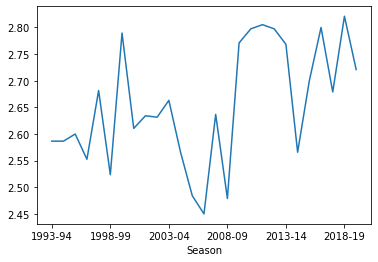

In [126]:
all_seasons = df.groupby('Season').apply(lambda df: (df['FTHG'] + df['FTAG']).mean())
all_seasons.plot()

##  תרגיל 8

האם יש לקבוצות נטייה להבקיע יותר/פחות שערים במחזורים מסוימים ?
שרטט על גרף אחד את התפלגות כמות השערים במחזורים.
כלומר, תשרטט גרף התפלגות אחד לכל  שלושה מחזורים עוקבים.

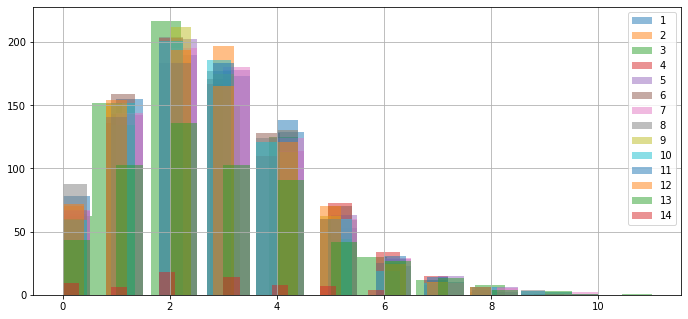

In [4]:
def get_cycle_column_for_season(season):
    n_teams = season['HomeTeam'].nunique()
    cycle_column = sorted(list(range(1, n_teams * 2-1)) * (n_teams // 2))
    return pd.Series(cycle_column)

df['Cycle'] = (df.groupby('Season').apply(get_cycle_column_for_season)).reset_index(drop=True)
###
df['TotalGoals'] = df['FTHG'] + df['FTAG']
df["Group of cycles"] = (df["Cycle"] - 1) // 3 + 1

plt.axes([0, 0, 1.5, 1])
groups = df.groupby("Group of cycles")['TotalGoals'].hist(bins=20, alpha=0.5)
plt.legend(df['Group of cycles'].drop_duplicates())

## תרגיל 9

האם בכל עונה יש את אותה כמות המחזורים ?

In [129]:
df.groupby('Season')['Cycle'].nunique().nunique() == 1

False

## תרגיל 10

כמה קבוצות שיחקו בליגה לאורך השנים ?

In [130]:
df["AwayTeam"].nunique()

49

## תרגיל 11

כמה מחזורים יש בכל עונה ?

In [167]:
df.groupby("Season")["Cycle"].nunique()

Season
1993-94    42
1994-95    42
1995-96    38
1996-97    38
1997-98    38
1998-99    38
1999-00    38
2000-01    38
2001-02    38
2002-03    38
2003-04    38
2004-05    38
2005-06    38
2006-07    38
2007-08    38
2008-09    38
2009-10    38
2010-11    38
2011-12    38
2012-13    38
2013-14    38
2014-15    38
2015-16    38
2016-17    38
2017-18    38
2018-19    38
2019-20    38
Name: Cycle, dtype: int64

## תרגיל 12

האם יש קבוצות שהשתתפו בעונה מסוימת, אבל לא שיחקו בה בכל המחזורים ? 

In [132]:
games_should_be_in_each_cycle = df.groupby('Season').apply(lambda df: df['HomeTeam'].nunique() // 2)
games_in_each_cycle = df.groupby('Season').apply(lambda df: df['Cycle'].value_counts().mean())
(games_should_be_in_each_cycle != games_in_each_cycle).any()

False

## תרגיל 13

תחשב לכל משחק, כמה נקודות כל קבוצה צברה במשחק.

In [7]:
df['Team win'] = [Hteam if result == 'H' else Ateam if result == 'A' else [Ateam, Hteam] for Hteam, Ateam, result in zip(df['HomeTeam'], df['AwayTeam'], df['FTR'])]
df['Points for the win team'] = [3 if result != 'D' else 1 for result in df['FTR']]

df

,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,AF,HY,AY,HR,AR,Cycle,TotalGoals,Group of cycles,Team win,Points for the win team
0,1993-94,1993-08-14 00:00:00,Arsenal,Coventry,0,3,A,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1,3,1,Coventry,3
1,1993-94,1993-08-14 00:00:00,West Ham,Wimbledon,0,2,A,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1,2,1,Wimbledon,3
2,1993-94,1993-08-14 00:00:00,Sheffield United,Swindon,3,1,H,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1,4,1,Sheffield United,3
3,1993-94,1993-08-14 00:00:00,Oldham,Ipswich,0,3,A,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1,3,1,Ipswich,3
4,1993-94,1993-08-14 00:00:00,Newcastle,Tottenham,0,1,A,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1,1,1,Tottenham,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10419,2019-20,2020-07-26 16:00:00,Chelsea,Wolves,2,0,H,2.0,0.0,H,...,16.0,2.0,3.0,0.0,0.0,38,2,13,Chelsea,3
10420,2019-20,2020-07-26 16:00:00,Burnley,Brighton,1,2,A,1.0,1.0,D,...,11.0,3.0,0.0,0.0,0.0,38,3,13,Brighton,3
10421,2019-20,2020-07-26 16:00:00,Arsenal,Watford,3,2,H,3.0,1.0,H,...,12.0,3.0,3.0,0.0,0.0,38,5,13,Arsenal,3
10422,2019-20,2020-07-26 16:00:00,Crystal Palace,Tottenham,1,1,D,0.0,1.0,A,...,13.0,3.0,2.0,0.0,0.0,38,2,13,"[Tottenham, Crystal Palace]",1


## 14 תרגיל

תחשב לכל עונה את הניקוד הכולל של כל אחת מהקבוצות. כלומר, עליך לחשב טבלה עם שלוש עמודות - שם הקבוצה שם העונה כמות הניקוד הכוללת של הקבוצה בעונה.

In [8]:
game_with_winner = df[df['Points for the win team'] == 3]

seas_table = game_with_winner.groupby(['Season', 'Team win'])['Points for the win team'].sum()

for x, dgame in df[df['FTR'] == 'D'].iterrows():
    home, away, season = dgame.loc['HomeTeam'], dgame.loc['AwayTeam'], dgame.loc['Season']
    seas_table.loc[(season, home)] += 1
    seas_table.loc[(season, away)] += 1

seas_table = seas_table.reset_index().rename(columns={'Points for the win team': 'Points in season', 'Team win': 'Team'}).sort_values(['Season', 'Points in season'], ascending=[True, False]).reset_index(drop=True)
seas_table

,Season,Team,Points in season
0,1993-94,Man United,92
1,1993-94,Blackburn,84
2,1993-94,Newcastle,77
3,1993-94,Arsenal,71
4,1993-94,Leeds,70
...,...,...,...
539,2019-20,West Ham,39
540,2019-20,Aston Villa,35
541,2019-20,Bournemouth,34
542,2019-20,Watford,34


## תרגיל 15

בהינתן שקבוצה סיימה בחמישייה הראשונה בעונה x מה הסיכוי שלה לסיים בחמישייה הראשונה בעונה x + 1 ?

In [135]:
all_seasons = list(seas_table.sort_values(['Season', 'Points in season'], ascending=[True, False]).groupby('Season'))

maximum = 0
count = 0
for (next_s, next_seas), (sea, season_table) in zip(all_seasons[1:], all_seasons[:-1]):
    leading_seas_teams = set(season_table[season_table['Points in season'] >= season_table.iloc[4]['Points in season']]['Team'])
    leading_next_seas_teams = set(next_seas[next_seas['Points in season'] >= next_seas.iloc[4]['Points in season']]['Team'])
    
    maximum += len(leading_seas_teams)
    count += len(leading_seas_teams & leading_next_seas_teams)

print(f"{count / maximum * 100:.3f}%")

75.758%


## תרגיל 16

נבדוק האם יש קבוצות שנוטות לייצר תוצאות תיקו באופן מיוחד
א. תחשב את הסיכוי של כל קבוצה לייצר תוצאת תיקו
ב. תשרטט את התפלגות הסיכויים 
אם יש קבוצה שחורגת ימינה מההתפלגות הנורמלית, אז ייתכן שהיא באמת נוטה לייצר תוצאות תיקו.

AwayTeam
Arsenal             25.435203
Aston Villa         29.565217
Barnsley            13.157895
Birmingham          30.827068
Blackburn           26.452599
Blackpool           23.684211
Bolton              25.910931
Bournemouth         22.631579
Bradford            26.315789
Brighton            31.578947
Burnley             23.245614
Cardiff             17.105263
Charlton            26.973684
Chelsea             24.081238
Coventry            31.730769
Crystal Palace      23.437500
Derby               26.315789
Everton             28.820116
Fulham              26.503759
Huddersfield        22.368421
Hull                25.263158
Ipswich             23.125000
Leeds               25.821596
Leicester           26.865672
Liverpool           24.564797
Man City            22.156398
Man United          21.663443
Middlesbrough       29.699248
Newcastle           25.574113
Norwich             28.525641
Nott'm Forest       31.410256
Oldham              30.952381
Portsmouth          24.436090
Q

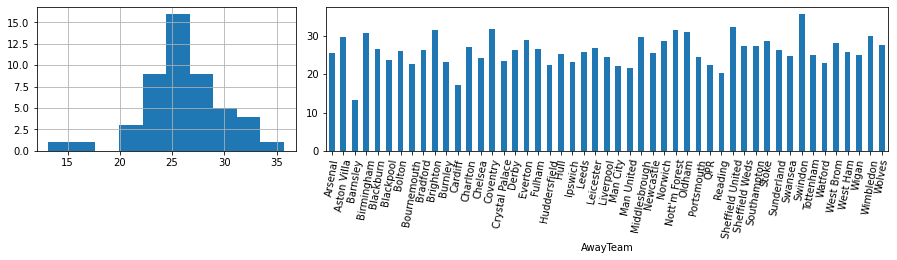

In [238]:
home_draw = df.pivot_table(values='FTR', index='HomeTeam', aggfunc=lambda x: (x == 'D').sum())['FTR'].sort_index()
away_draw = df.pivot_table(values='FTR', index='AwayTeam', aggfunc=lambda x: (x == 'D').sum())['FTR'].sort_index()
# or like that:
# home_draw = df.groupby('HomeTeam')['FTR'].apply(lambda x: (x == 'D').sum()).sort_index()
# away_draw = df.groupby('AwayTeam')['FTR'].apply(lambda x: (x == 'D').sum()).sort_index()

home_games = df.groupby('HomeTeam').size()
away_games = df.groupby('HomeTeam').size()

chance_each_team = (away_draw + home_draw) / (home_games + away_games) * 100
print(chance_each_team)

plt.axes([0, 0, 0.6, 0.5])
chance_each_team.hist()

plt.axes([0.67, 0, 1.3, 0.5])
chance_each_team.plot(kind='bar', rot=80)

## תרגיל 17

האם להבקיע כמות מקסימלית של שערים מבטיח מקום ראשון בליגה ?
תחשב מי הקבוצה שהבקיעה הכי הרבה שערים בכל עונה.
תבדוק  כמה מתוכן סיימו ראשונות

In [137]:
win_team_in_each_season = seas_table.sort_values(['Season', 'Points in season'], ascending=[True, False]).groupby('Season').nth(0)['Team']
home_teams_total_golls = df.groupby(['Season', 'HomeTeam'])['FTHG'].sum().reset_index().rename(columns={'HomeTeam': 'Team', 'FTHG': 'TotalGoals'})
away_teams_total_golls = df.groupby(['Season', 'AwayTeam'])['FTAG'].sum().reset_index().rename(columns={'AwayTeam': 'Team', 'FTAG': 'TotalGoals'})

teams_total_golls = pd.concat([home_teams_total_golls, away_teams_total_golls]).pivot_table(
    values='TotalGoals',index=['Season', 'Team'],aggfunc='sum').reset_index().sort_values(['Season',
                                                                                'TotalGoals'], ascending=[True, False])
most_goals_team_in_season = teams_total_golls.groupby('Season').nth(0)['Team']

print(f'{(win_team_in_each_season == most_goals_team_in_season).mean() * 100:.5f}%')

62.96296%


## תרגיל 18

בהינתן שקבוצה מנצחת שני משחקים ברצף, מה הסיכוי שלה לנצח את המשחק שלאחר מכן ?

In [138]:
all_teams = list(dict.fromkeys(df['HomeTeam']))

two_in_row = 0
three_in_row = 0

for team in all_teams:
    winners_in_team_games = df[(df['HomeTeam'] == team) | (df['AwayTeam'] == team)]['Team win']
    
    for fir_ind in range(len(winners_in_team_games) - 3):
        bool_s = (team == winners_in_team_games.iloc[fir_ind] and team == winners_in_team_games.iloc[fir_ind + 1])
        two_in_row += bool_s
        three_in_row += bool_s and team == winners_in_team_games.iloc[fir_ind + 2]

print(f'{three_in_row / two_in_row * 100:.5f}%')

46.78606%


## תרגיל 19

###### X אם במחזור
###### קבוצה הפסידה משחק וקבוצה אחרת ניצחה משחק,
###### X+1 והן נפגשות במחזור
###### מה הסיכוי של כל אחת מהן לנצח ?

In [9]:
cycles = list(df.groupby('Cycle'))

two_team_meet_like_that = 0
lost = 0
won = 0
draw = 0

for (cycle, cycle_df), (next_cycle, next_cycle_df) in zip(cycles[:-1], cycles[1:]):
    cycle_df = cycle_df[cycle_df['FTR'] != 'D']
    wins_teams = list(cycle_df['Team win'])
    
    for ind, game in next_cycle_df.iterrows():
        home_team = game['HomeTeam']
        away_team = game['AwayTeam']
        
        home_team_won = (home_team in wins_teams)
        away_team_won = (away_team in wins_teams)
        
        if not(not(not(home_team_won) and not(away_team_won)) and not(home_team_won and away_team_won)):
            continue
        two_team_meet_like_that += 1
        
        if home_team_won:
            won_team = home_team
            lost_team = away_team
        else:
            won_team = away_team
            lost_team = home_team
        
        game_winner = game['Team win']
        if won_team == game_winner:
            won += 1
        elif lost_team == game_winner:
            lost += 1
        else:
            draw += 1
print(f'The chance for the won team to win: {won / two_team_meet_like_that * 100:.5f}%.')
print(f'The chance for the lost team to win: {lost / two_team_meet_like_that * 100:.5f}%.')
print(f'The chance to draw: {draw / two_team_meet_like_that * 100:.5f}%.')

The chance for the won team to win: 45.74689%.
The chance for the lost team to win: 25.00000%.
The chance to draw: 29.25311%.
